<a href="https://colab.research.google.com/github/sana9524/Data_-Science_Assign/blob/main/Linear_Regression(delivery_time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path=r"/content/delivery_time.csv"
data=pd.read_csv(path)
data.head()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [27]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [28]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<ipython-input-29-572ac3832e15>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


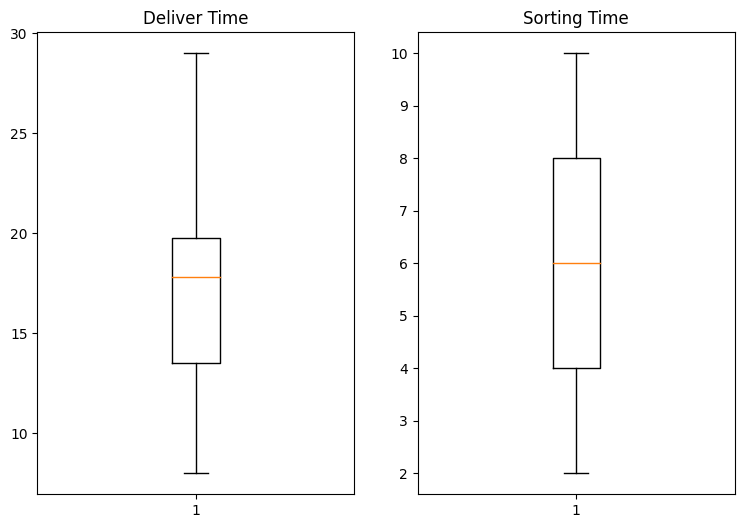

In [29]:
# Plotting Boxplot to check the outliers
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(data['Delivery Time'])
plt.title('Deliver Time')
plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [30]:

# Checking corelation between two varibles
data.corr()


,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

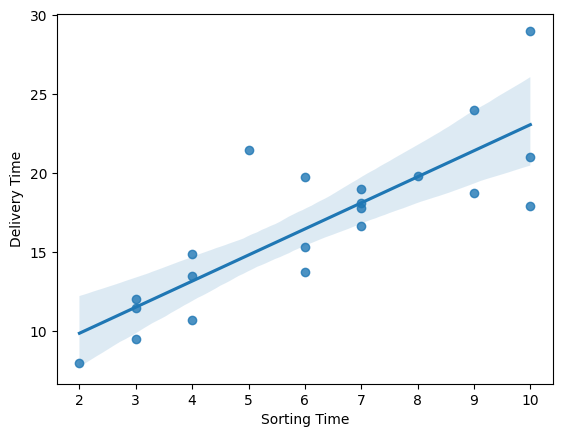

In [31]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])

<ipython-input-32-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

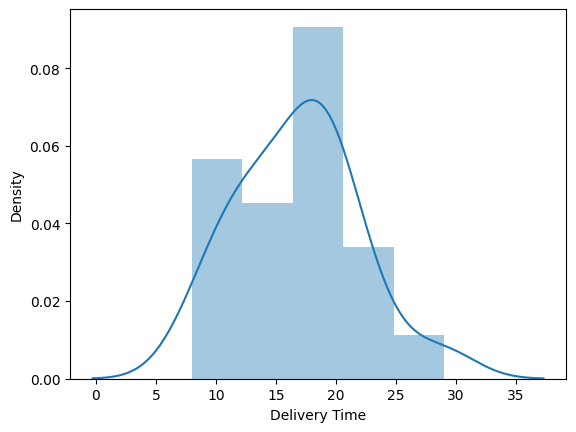

In [32]:
sns.distplot(data['Delivery Time'])

<ipython-input-33-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

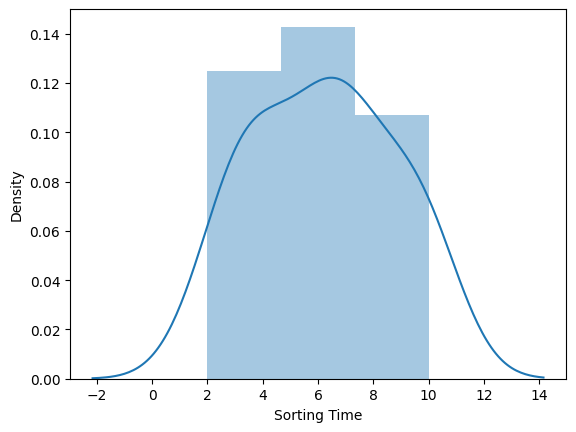

In [33]:

sns.distplot(data['Sorting Time'])

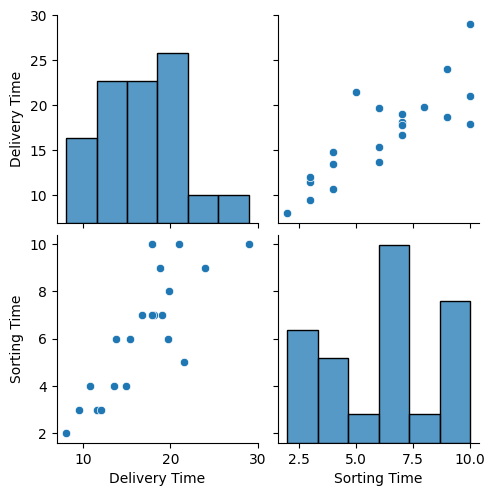

In [34]:
sns.pairplot(data)

In [35]:
X=data.iloc[:,:-1]
y=data.iloc[:,1]






In [36]:
X

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [37]:
y

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [39]:
X_train


,Delivery Time
10,19.83
14,12.03
18,8.00
6,19.00
19,17.83
4,29.00
2,19.75
5,15.35
16,13.75
9,18.75


In [40]:
X_train

,Delivery Time
10,19.83
14,12.03
18,8.00
6,19.00
19,17.83
4,29.00
2,19.75
5,15.35
16,13.75
9,18.75


In [41]:
y_train

10     8
14     3
18     2
6      7
19     7
4     10
2      6
5      6
16     6
9      9
7      3
17     7
3      9
0     10
15     4
12     7
Name: Sorting Time, dtype: int64

In [42]:
y_test

8     10
13     3
20     5
1      4
11     4
Name: Sorting Time, dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [44]:
y_pred=model.predict(X_test)
y_pred

array([6.73686067, 4.02382575, 8.26294281, 4.87164916, 3.70589197])

In [45]:
y_pred=model.predict(X_test)
y_pred
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R^2 Score:',r2)

Mean Squared Error: 4.637873006804292
R^2 Score: 0.2470985378564461


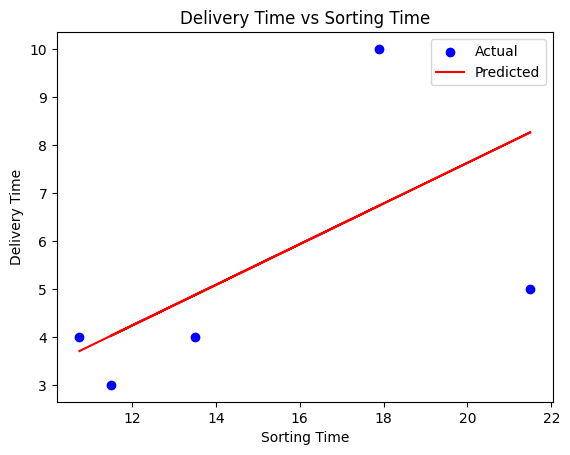

In [46]:
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.plot(X_test, y_pred, color='r', label='Predicted')
plt.title('Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()